## Building The Country Page Widgets

Charlie has added the following datasets to the **STAGING** API for the construction of the new country pages widgets. This notebook details how to query these datasets to create a the required widgets.


```
[
    {
        "name": "IFL 2000",
        "gain": "27ed6d3c-89e8-4087-aa78-1b6619c0e8d5",
        "loss": "cbf299f8-f365-4ba3-ad10-b8c1324bea62",
        "extent": "1676bb7f-a858-4298-8faa-c85cb169ca20"
    },

    {
        "name": "IFL 2013",
        "gain": "19be9cf6-3dfc-4b77-b95e-39a6751e55bf",
        "loss": "2a4bf55c-7e0e-45cd-ac3f-f1e890c0bd22",
        "extent": "2cfc35b0-aa9b-4939-8265-ee643b3afeb5"
    },

    {
        "name": "wdpa",
        "gain": "23519a73-f4b8-4bb6-8a6a-1d84c38debca",
        "loss": "9289fdf7-b2b0-4cbf-8951-9dd4dcd8ccd7",
        "extent": "8d7e23ec-bc8c-4434-bc6a-6ce40459b424"
    },

    {
        "name": "primary forests",
        "gain": "fd3b3a12-121e-4189-96a3-d8c26b70952d",
        "loss": "7a5b92ab-2d35-45f3-b923-20c9a46d4873",
        "extent": "b987b360-190e-4560-a632-03946347d226"
    },

    {
        "name": "biodiversity hot spots",
        "gain": "bd061864-8efb-41a7-8ba0-6f4d25ed1fd8",
        "loss": "32a963c1-26d7-4a21-b602-17144fd78c0f",
        "extent": "6c00c104-a75b-4b0b-9c33-0d0aa29cdf93"
    },

    {
        "name": "gadm28 only",
        "gain": "e78a9c36-ed15-467a-babd-0a5ac21d07d7",
        "loss": "88994c38-1ea1-4a32-82ca-073547d11176",
        "extent": "f0e01525-9576-4613-a74b-3290c94047ca"
    },

    {
        "name": "GFW Plantations",
        "gain": "94a883de-4eb4-4be8-a05f-c77ea8d9c6a3",
        "loss": "17a7970a-23ba-45ab-8004-37090b4e2502",
        "extent": "9b617bbb-b99b-4543-832d-665adeec3341"
    },

    {
        "name": "GFW Managed Forests",
        "gain": "c88957d7-4635-4fb7-b729-db565122529d",
        "loss": "c500cb21-fdf0-426b-9a89-4a581f33ed18",
        "extent": "f9e40f0f-4f9f-4d93-957d-1fa15dd29333"
    }
]
```

In [28]:
import requests
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
# Example of what is in the data tables and how to simply read them:
ds = "f0e01525-9576-4613-a74b-3290c94047ca" # gadm28 tree cover extent UMD 2013
url = "https://staging-api.globalforestwatch.org/query"
sql = (f"SELECT * FROM {ds} WHERE iso = 'BRA' AND thresh=30 LIMIT 5")
properties = {"sql": sql}
r = requests.get(url, params = properties)
print(r.url)
print(f'Status: {r.status_code}')
r.json()

https://staging-api.globalforestwatch.org/query?sql=SELECT+%2A+FROM+f0e01525-9576-4613-a74b-3290c94047ca+WHERE+iso+%3D+%27BRA%27+AND+thresh%3D30+LIMIT+5
Status: 200


{'data': [{'_id': 'AV5SxVwVD0oexj_vqcdH',
   'adm1': 1,
   'adm2': 11,
   'area': 806167.3365414925,
   'iso': 'BRA',
   'thresh': 30},
  {'_id': 'AV5SxVwVD0oexj_vqcdP',
   'adm1': 1,
   'adm2': 3,
   'area': 1786.439707780866,
   'iso': 'BRA',
   'thresh': 30},
  {'_id': 'AV5SxVwVD0oexj_vqcdo',
   'adm1': 1,
   'adm2': 2,
   'area': 251327.7247623493,
   'iso': 'BRA',
   'thresh': 30},
  {'_id': 'AV5SxVwVD0oexj_vqceg',
   'adm1': 4,
   'adm2': 173,
   'area': 5485290.172959662,
   'iso': 'BRA',
   'thresh': 30},
  {'_id': 'AV5SxVwVD0oexj_vqce5',
   'adm1': 4,
   'adm2': 164,
   'area': 613426.4604613866,
   'iso': 'BRA',
   'thresh': 30}],
 'meta': {'cloneUrl': {'body': {'dataset': {'application': ['your', 'apps'],
     'datasetUrl': '/v1/query/f0e01525-9576-4613-a74b-3290c94047ca'}},
   'http_method': 'POST',
   'url': '/v1/dataset/f0e01525-9576-4613-a74b-3290c94047ca/clone'}}}

# Tree cover widget

Default view where plantations data aviable for a country:

Uses:
    * Tree cover 2013 ("extent": "2cfc35b0-aa9b-4939-8265-ee643b3afeb5")
    * Plantations ("extent": "9b617bbb-b99b-4543-832d-665adeec3341")
    * Area of country

To calculate 3 slices in a pie chart:
    * Tree plantations
    * Natural forest (tree cover 2013 - tree plantations)
    * Non-forest (total area - tree cover 2013)



In [48]:
# note adm0 = BRA, adm1 = 4  is Amazonas
# adm0 = BRA, adm1 = 4, adm2 = 141 is Amaturá  (many forests)
# adm0 = BRA, adm1 = 12, adm2 = 1434 is Mato Grosso, Cáceres
# adm0 = BRA, adm1 = 14, adm2 = 2404 is Para, Altamira 
# adm0 = BRA, adm1 = 16, adm2 = 3135 - largest area of plantations (Turning this on seems to reveal a bug)

url = "https://staging-api.globalforestwatch.org/query"
adm0 = 'BRA'
threshold = 30
adm1 = None
adm2 = None

In [56]:
def extent_queries(ds, adm0, adm1=None, adm2 = None):
    if adm0 and not adm1 and not adm2:
        print('Request for adm0 area')
        sql = (f"SELECT SUM(area) as value FROM {ds} WHERE iso = '{adm0}' "
               f"AND thresh = {threshold}")
    elif adm0 and adm1 and not adm2:
        print('Request for  adm1 area')
        sql = (f"SELECT SUM(area) as value FROM {ds} WHERE iso = '{adm0}' "
               f"AND adm1 = {adm1} AND thresh = {threshold}")
    elif adm0 and adm1 and adm2:
        print('Request for  adm2 area')
        sql = (f"SELECT area as value FROM {ds} WHERE iso = '{adm0}' "
               f"AND adm1 = {adm1} AND adm2 = {adm2} AND thresh = {threshold}") 
    return sql

In [57]:
##  UMD Tree cover extent 2013 over gadm28 areas 
ds = "f0e01525-9576-4613-a74b-3290c94047ca"
sql = extent_queries(ds=ds, adm0=adm0, adm1=adm1, adm2=adm2)
r = requests.get(url, params = {"sql": sql})

print(r.url)
print(f'Status: {r.status_code}')
pprint(r.json())

try:
    tree_cover_extent_2013 = r.json().get('data')[0].get('value')
except:
    tree_cover_extent_2013 = 0.0
print(f"\n{adm0} {adm1} {adm2} Gadm28 Tree cover extent = {tree_cover_extent_2013} ha")

Request for adm0 area
https://staging-api.globalforestwatch.org/query?sql=SELECT+SUM%28area%29+as+value+FROM+f0e01525-9576-4613-a74b-3290c94047ca+WHERE+iso+%3D+%27BRA%27+AND+thresh+%3D+30
Status: 200
{'data': [{'value': 244872188.7236061}],
 'meta': {'cloneUrl': {'body': {'dataset': {'application': ['your', 'apps'],
                                            'datasetUrl': '/v1/query/f0e01525-9576-4613-a74b-3290c94047ca'}},
                       'http_method': 'POST',
                       'url': '/v1/dataset/f0e01525-9576-4613-a74b-3290c94047ca/clone'}}}

BRA None None Gadm28 Tree cover extent = 244872188.7236061 ha


So far I don't like this value. It is way too low: the 2000 UMD extent data for Brazil gives 519,187,505 ha
From this table we are getting 244,872,188 ha. Doesn't look right...

In [58]:
# GFW plantations (should be area of forest intersecting tree plantations at admin2 level from gadm28 shapes)

ds = "9b617bbb-b99b-4543-832d-665adeec3341"
sql = extent_queries(ds=ds, adm0=adm0, adm1=adm1, adm2=adm2)
r = requests.get(url, params = {"sql": sql})

print(r.url)
print(f'Status: {r.status_code}')
pprint(r.json())

try:
    plantations = r.json().get('data')[0].get('value')
except:
    plantations = 0.0
print(f"\n{adm0} {adm1} {adm2} plantation area = {plantations} ha")

Request for adm0 area
https://staging-api.globalforestwatch.org/query?sql=SELECT+SUM%28area%29+as+value+FROM+9b617bbb-b99b-4543-832d-665adeec3341+WHERE+iso+%3D+%27BRA%27+AND+thresh+%3D+30
Status: 200
{'data': [{'value': 4659701.8839049935}],
 'meta': {'cloneUrl': {'body': {'dataset': {'application': ['your', 'apps'],
                                            'datasetUrl': '/v1/query/9b617bbb-b99b-4543-832d-665adeec3341'}},
                       'http_method': 'POST',
                       'url': '/v1/dataset/9b617bbb-b99b-4543-832d-665adeec3341/clone'}}}

BRA None None plantation area = 4659701.8839049935 ha


In [59]:
def area_queries(adm0, adm1=None, adm2 = None):
    if adm0 and not adm1 and not adm2:
        print('Request for adm0 area')
        sql = ("SELECT ROUND(SUM(ST_AREA(the_geom::geography)) * 0.0001) as value "
                "FROM gadm28_adm2 "
               f"WHERE iso = '{adm0}'")
    elif adm0 and adm1 and not adm2:
        print('Request for adm1 area')
        sql = ("SELECT ROUND(SUM(ST_AREA(the_geom::geography)) * 0.0001) as value "
                "FROM gadm28_adm2 "
               f"WHERE iso = '{adm0}' "
               f"AND id_1 = {adm1} ")
    elif adm0 and adm1 and adm2:
        print('Request for adm2 area')
        sql = ("SELECT ROUND(ST_AREA(the_geom::geography) * 0.0001) as value "
                "FROM gadm28_adm2 "
                f"WHERE iso = '{adm0}' "
                f"AND id_1 = {adm1} "
                f"AND id_2 = {adm2} ")
    return sql

In [63]:
# Total area (ha) of selected area based on gadm28 table in Carto account

sql = area_queries(adm0=adm0, adm1=adm1, adm2=adm2)

account = 'wri-01'
urlCarto = "https://{0}.carto.com/api/v2/sql".format(account)

sql = {"q": sql}
r = requests.get(urlCarto, params=sql)
print(r.url,'\n')
pprint(r.json())

total_area = r.json().get('rows')[0].get('value')
print(f"\n {total_area} ha total area selected")

Request for adm0 area
https://wri-01.carto.com/api/v2/sql?q=SELECT+ROUND%28SUM%28ST_AREA%28the_geom%3A%3Ageography%29%29+%2A+0.0001%29+as+value+FROM+gadm28_adm2+WHERE+iso+%3D+%27BRA%27 

{'fields': {'value': {'type': 'number'}},
 'rows': [{'value': 850402597}],
 'time': 0.623,
 'total_rows': 1}

 850402597 ha total area selected


In [64]:
print(f"plantations={plantations:g}, tree cover={tree_cover_extent_2013:g}, area={total_area:g}")
plantations, tree_cover_extent_2013 - plantations, total_area - tree_cover_extent_2013

plantations=4.6597e+06, tree cover=2.44872e+08, area=8.50403e+08


(4659701.8839049935, 240212486.83970112, 605530408.2763939)

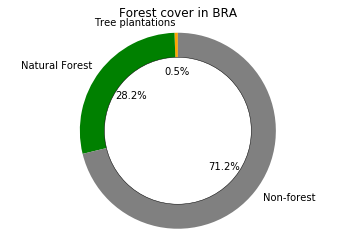

In [65]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Tree plantations', 'Natural Forest', 'Non-forest'
sizes = [plantations, tree_cover_extent_2013 - plantations, total_area - tree_cover_extent_2013]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=['orange','green','grey'])
ax1.axis('equal')
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=0.5)
fig1 = plt.gcf()
fig1.gca().add_artist(centre_circle)
plt.title(f'Forest cover in {adm0}')
plt.show()